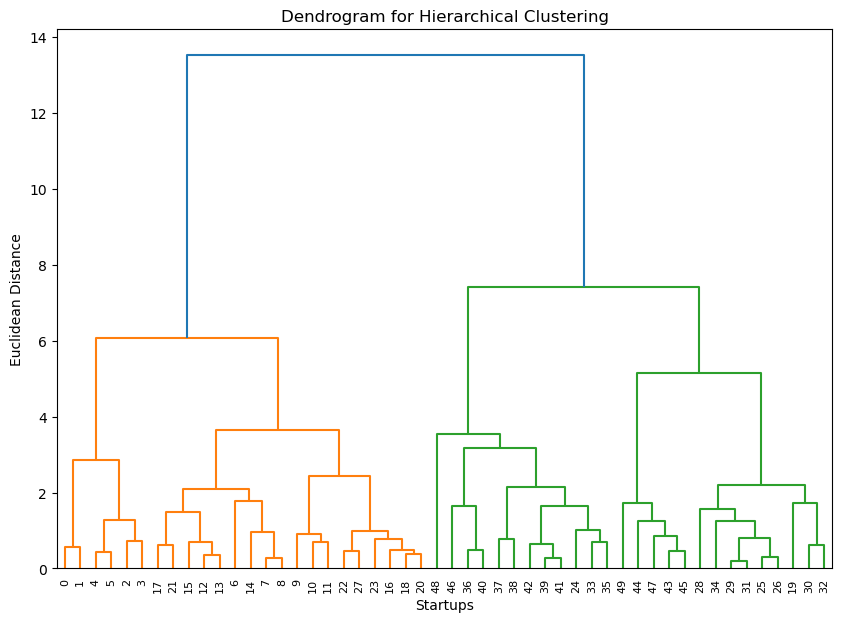

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


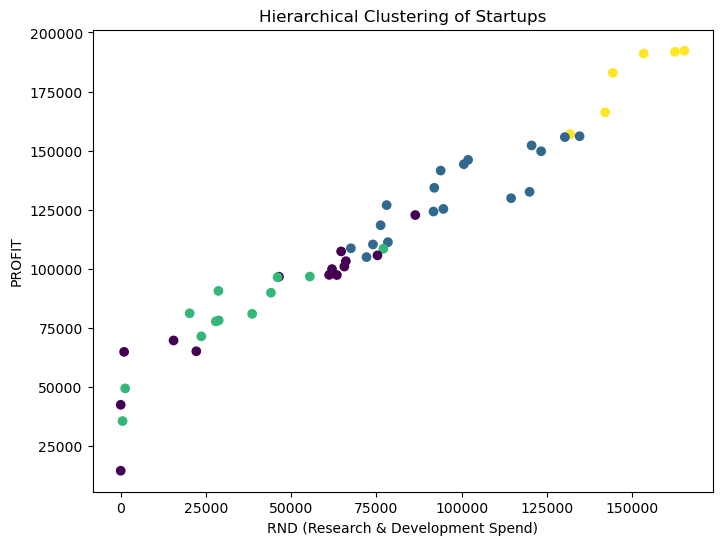

         RND      ADMIN        MKT     PROFIT  Cluster
0  165349.20  136897.80  471784.10  192261.83        3
1  162597.70  151377.59  443898.53  191792.06        3
2  153441.51  101145.55  407934.54  191050.39        3
3  144372.41  118671.85  383199.62  182901.99        3
4  142107.34   91391.77  366168.42  166187.94        3


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\K-Means & Hirarchical Clustering\50_Startups.csv")

# Step 2: Data Preprocessing
# Label Encoding for 'STATE' column
label_encoder = LabelEncoder()
df['STATE'] = label_encoder.fit_transform(df['STATE'])  # Convert states to numeric values

# Select features for clustering (RND, ADMIN, MKT, PROFIT)
X = df[['RND', 'ADMIN', 'MKT', 'PROFIT']]

# Step 3: Feature Scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply Hierarchical Clustering (Agglomerative)
# Using a dendrogram to determine the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Startups')
plt.ylabel('Euclidean Distance')
plt.show()

# From the dendrogram, we can choose the number of clusters (let's say 4 clusters for this example)
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

# Step 5: Add the cluster labels to the original dataset
df['Cluster'] = y_hc

# Step 6: Visualizing the clusters
# We can plot two features, for example 'RND' and 'PROFIT', to visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['RND'], df['PROFIT'], c=df['Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering of Startups')
plt.xlabel('RND (Research & Development Spend)')
plt.ylabel('PROFIT')
plt.show()

# Optionally, display the cluster centers or distribution
print(df[['RND', 'ADMIN', 'MKT', 'PROFIT', 'Cluster']].head())
